# Random Forests

Random forests offer an enhancement to bagged trees through a simple adjustment that introduces tree decorrelation. Like in bagging, we construct multiple decision trees on bootstrapped training samples. However, when constructing these trees, at each split point, only a random subset of m predictors is considered as potential candidates for the split, drawn from the full set of p predictors {cite:p}`james2023introduction`.

The math behind Random Forests involves a few key concepts that contribute to its effectiveness in enhancing decision trees. Let's break down the main components {cite:p}`hastie2013elements, james2023introduction`:

1. **Bootstrap Sampling:** In Random Forests, multiple decision trees are created, each based on a different subset of the training data. These subsets are obtained through a process called bootstrap sampling. Given a dataset with $n$ observations, bootstrap sampling involves randomly selecting 'n' observations with replacement. This means that some observations may be included multiple times in the subset, while others may not be included at all. This process generates diverse training subsets for building different trees.

2. **Random Feature Selection:** At each split point of a decision tree within a Random Forest, instead of considering all available features (predictors), a random subset of features is selected as candidates for the split. This introduces randomness and diversity among the trees. The number of features in the subset, denoted as $m$, is typically smaller than the total number of predictors $p$. This process helps decorrelate the trees, reducing the chance of them making similar errors and leading to more accurate predictions.

3. **Voting or Averaging:** Once all the trees are constructed, their predictions are combined to make a final prediction. For regression tasks, the predictions from individual trees are usually averaged to obtain the final prediction. For classification tasks, a majority vote among the predictions is often taken to determine the class label. This ensemble approach helps improve the overall accuracy and stability of the model.

Mathematically, the process of Random Forests involves creating $B$ decision trees, each constructed using a different bootstrap sample and a random subset of $m$ features at each split point. The final prediction for a new observation is obtained by averaging (for regression) or majority voting (for classification) the predictions from all the trees:

For regression:
\begin{equation}
\hat{f}_{rf}(x) = \frac{1}{B}\sum_{b = 1}^{B} \hat{f}^{b}(x)
\end{equation}

```{figure} RFR_Fig.jpg
---
width: 600px
align: center
---
A visual of Random Forests Algorithm for regression.
```

For classification:
\begin{equation}
\hat{C}_{rf}(x) = \text{majority vote}\left(\hat{C}^{1}(x), \hat{C}^{2}(x), \ldots, \hat{C}^{B}(x)\right)
\end{equation}

```{figure} RFC_Fig.jpg
---
width: 600px
align: center
---
A visual of Random Forests Algorithm for classification.
```

Here, $\hat{f}^{b}(x)$ represents the prediction of the 'b'-th tree for observation 'x', and $\hat{C}^{b}(x)$ represents the class predicted by the 'b'-th tree for observation 'x'.

The random forest algorithm's combination of bootstrap sampling and random feature selection helps create a diverse ensemble of trees that work together to provide more accurate and stable predictions, reducing the likelihood of overfitting and improving the model's generalization ability.

```{admonition} Random Forest algorithm 

1. **Data Preparation:**
   - $N$ = Number of samples in the dataset
   - $M$ = Number of features in each sample
   - $x_i$ = Input features for the $i$-th sample
   - $y_i$ = Output label for regression task (real value)
   - $C_i$ = Output class for classification task (categorical value)

2. **Bootstrapping:**
   - Randomly select $N$ samples with replacement to create multiple bags (bootstrap samples).
   - In scikit-learn's API, the parameter controlling this is `bootstrap=True`.

3. **Growing Individual Trees:**
   - Each individual tree $t$ is trained on one of the bootstrap samples.
   - At each node of tree $t$, consider a random subset of features of size $m$ for splitting.
   - Stop growing the tree based on stopping criteria like maximum depth or minimum samples per leaf.
   - In scikit-learn, you can control maximum depth with `max_depth` and minimum samples per leaf with `min_samples_leaf`.

4. **Voting or Averaging:**
   - For classification: Let $k$ be the number of classes. Each tree predicts a class $C_i$ for input $x_i$. The final prediction is the majority class among all trees' predictions.
   - For regression: Each tree predicts a value $y_i$ for input $x_i$. The final prediction is the average of all trees' predictions.
   - In scikit-learn, you can set `n_estimators` to determine the number of trees.

5. **Out-of-Bag (OOB) Error:**
   - For each sample $i$, if it's not in the training set of tree $t$, we can use its prediction to calculate the OOB error.
   - In scikit-learn, OOB error can be calculated by setting `oob_score=True`.

6. **Randomness and Diversity:**
   - For feature subset selection, $m$ is typically set to $\sqrt{M}$ for classification and $\frac{M}{3}$ for regression.
   - This randomness encourages different trees to focus on different subsets of features, leading to diversity.

7. **Hyperparameters:**
   - `n_estimators`: Number of trees in the forest.
   - `max_depth`: Maximum depth of each tree.
   - `min_samples_split`: Minimum number of samples required to split an internal node.
   - `min_samples_leaf`: Minimum number of samples required to be at a leaf node.
   - `max_features`: Number of features to consider for the best split at each node.
   - `bootstrap`: Whether bootstrap samples should be used.
   - `oob_score`: Whether to calculate out-of-bag score.

```

The Random Forests algorithm combines the predictions from multiple decision trees, each constructed on a different bootstrap sample and a subset of features. The diversity introduced by these mechanisms helps to reduce overfitting and improve the generalization performance of the ensemble model. Additionally, Random Forests provide insights into feature importance, which can be used for feature selection and understanding the underlying relationships in the data {cite:p}`breiman2001random,james2023introduction`.

Keep in mind that the algorithm can be further customized and optimized with various hyperparameters and techniques, such as adjusting the number of trees, tuning the size of the feature subset, and handling missing values and categorical variables. Implementation details may vary depending on the programming language or library you're using.

Here's how these concepts relate to scikit-learn's API:

```python
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Creating a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2,
                             min_samples_leaf=1, max_features="auto", bootstrap=True,
                             oob_score=True)

# Creating a Random Forest Regressor
reg = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2,
                            min_samples_leaf=1, max_features="auto", bootstrap=True,
                            oob_score=True)
```

You can replace the hyperparameter values above with your desired settings. The scikit-learn API makes it convenient to configure the Random Forest algorithm for your specific task and data.

## Feature Importances

In the context of a random forest model, the `feature_importances_` attribute serves as an essential metric for gauging the significance of individual features in facilitating accurate predictions. This attribute offers valuable insights into the influential role that each feature plays in shaping the model's predictions {cite:p}`pedregosa2011scikit,sklearnUserGuide`.

### Calculation of `feature_importances_`:

The determination of feature importance in a random forest involves assessing how much each feature contributes to the reduction of impurity, commonly measured using metrics such as Gini impurity or Mean Squared Error, within the individual decision trees constituting the forest. The process unfolds as follows {cite:p}`pedregosa2011scikit,sklearnUserGuide`:

1. **Tree Level Calculation:** Within each decision tree of the random forest, candidate features for splitting are identified based on the impurity reduction each feature would bring if chosen as the split feature. Metrics like Gini impurity or Mean Squared Error are frequently employed for this purpose.

2. **Feature Contribution:** For each candidate feature in each tree, the algorithm quantifies how much the feature diminishes impurity in the data. Greater reduction implies a higher importance for that specific tree.

3. **Averaging Across Trees:** After constructing all individual trees, the importance of each feature is averaged across the entire forest. This results in an importance score for each feature, indicating its collective contribution to the model's predictions.

4. **Normalization:** Importance scores are typically normalized to sum up to 1 or 100. This normalization aids in interpreting the relative importance of each feature.

5. **Interpretation:** A higher importance score denotes that a feature exerts a more substantial influence on the model's predictions. Conversely, features with lower importance scores contribute less to the model's predictive capabilities.

### Interpretation of `feature_importances_`:

The values within the `feature_importances_` array sum up to 0 or 1, contingent on normalization. These values are relative and offer insights into which features wield a more pronounced impact on the model's predictions. Higher importance values signify a more significant contribution to the model's ability to make accurate predictions.

By scrutinizing `feature_importances_`, one can pinpoint key features steering the model's performance, concentrate on pertinent variables, and potentially engage in feature selection to enhance model efficiency.

In essence, `feature_importances_` in a random forest model quantifies the contribution of each feature to the reduction of impurity across individual trees, providing a valuable tool for comprehending feature relevance and model behavior.

##  Random Forest Regressor

<font color='Blue'><b>Example</b></font>. Recall the Auto MPG dataset retrieved from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/dataset/9/auto+mpg).

In [1]:
import pandas as pd
# You can download the dataset from: http://archive.ics.uci.edu/static/public/9/auto+mpg.zip

# Define column names based on the dataset's description
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model_Year', 'Origin', 'Car_Name']

# Read the dataset with column names, treating '?' as missing values, and remove rows with missing values
auto_mpg_df = pd.read_csv('auto-mpg.data', names=column_names,
                          na_values='?', delim_whitespace=True).dropna().reset_index(drop = True)

# Remove the 'Car_Name' column from the DataFrame
auto_mpg_df = auto_mpg_df.drop(columns=['Car_Name'])

# Display the resulting DataFrame
display(auto_mpg_df)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,2
389,32.0,4,135.0,84.0,2295.0,11.6,82,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score

# Extract the features (X) and target variable (y)
X = auto_mpg_df.drop(columns=['MPG'])
y = np.log(auto_mpg_df.MPG.values)  # Take the natural logarithm of the MPG values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
set_size_df = pd.DataFrame({'Size': [len(X_train), len(X_test)]}, index = ['Train', 'Test'])
display(set_size_df.T)

,Train,Test
Size,294,98


Our goal is to create a Random Forest Regression model with certain specifications. In this setup, the model consists of four decision trees, each constrained to a maximum of three leaf nodes. The intention behind these parameter choices is to build an ensemble of decision trees that work together to make accurate regression predictions. The restriction on the number of nodes in each tree serves to manage the overall complexity of the model. The next step involves training the model using the provided training data, where `X_train` represents the features, and `y_train` represents the corresponding target values. Throughout this training process, the model evaluates the importance of each feature, contributing to a comprehensive understanding of its predictive capabilities.

Feature Importance:


,Estimator 1,Estimator 2,Estimator 3,Estimator 4
Cylinders,87.97,0.00,0.00,0.00
Displacement,0.00,89.12,90.16,88.72
Horsepower,12.03,10.88,9.84,11.28
Weight,0.00,0.00,0.00,0.00
Acceleration,0.00,0.00,0.00,0.00
Model_Year,0.00,0.00,0.00,0.00
Origin,0.00,0.00,0.00,0.00


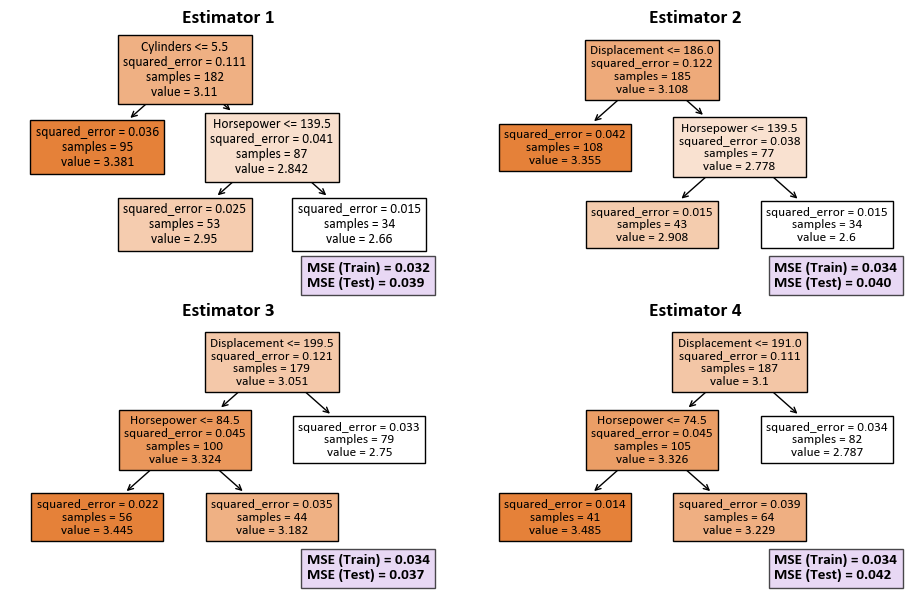

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
plt.style.use('../mystyle.mplstyle')

def print_bold(txt, c=31):
    """
    Function to print text in bold with specified color.

    Parameters:
    - txt (str): Text to be printed.
    - c (int): Color code for the printed text.

    Returns:
    None
    """
    print(f"\033[1;{c}m" + txt + "\033[0m")

# Instantiate RandomForestRegressor with specified parameters
rfr = RandomForestRegressor(n_estimators=4, random_state=0, max_leaf_nodes=3)
rfr.fit(X_train, y_train)

# Create subplots for each estimator
fig, ax = plt.subplots(2, 2, figsize=(9.5, 6))
ax = ax.ravel()

# Initialize DataFrame for feature importance
feat_importance_df = pd.DataFrame()

# Iterate over estimators to plot trees and calculate MSE
for i, (estimator, ax) in enumerate(zip(rfr.estimators_, ax), start=1):
    tree.plot_tree(estimator, ax=ax, feature_names=X.columns.tolist(), filled=True)
    ax.set_title(f'Estimator {i}', fontsize=14, weight='bold')
    
    # Calculate MSE for both training and test sets
    mse_train = metrics.mean_squared_error(y_train, estimator.predict(X_train.values))
    mse_test = metrics.mean_squared_error(y_test, estimator.predict(X_test.values))
    txt = f'MSE (Train) = {mse_train:.3f}\nMSE (Test) = {mse_test:.3f}'
    
    # Display MSE values on each subplot
    text = ax.text(0.68, -0.1, txt,
                  transform=ax.transAxes, fontsize=11, weight='bold',
                  bbox=dict(facecolor='#dfc8f0', alpha=0.7))
    
    # Create DataFrame with feature importances for each estimator
    df_temp = pd.DataFrame({f'Estimator {i}': 100*estimator.feature_importances_}, index=X.columns)
    feat_importance_df = pd.concat([feat_importance_df, df_temp], axis=1)

# Ensure tight layout for subplots
plt.tight_layout()

# Apply background gradient to the DataFrame and round importance values to 2 decimal places
styled_importance = feat_importance_df.style.\
                    background_gradient(cmap='Reds', axis=1, vmin=0, vmax=100).format(precision=2)

# Display the styled DataFrame
print_bold('Feature Importance:')
display(styled_importance)

MSE (Train) = 0.027
MSE (Test) = 0.033


,Importance
Cylinders,21.99
Displacement,67.00
Horsepower,11.01
Weight,0.00
Acceleration,0.00
Model_Year,0.00
Origin,0.00


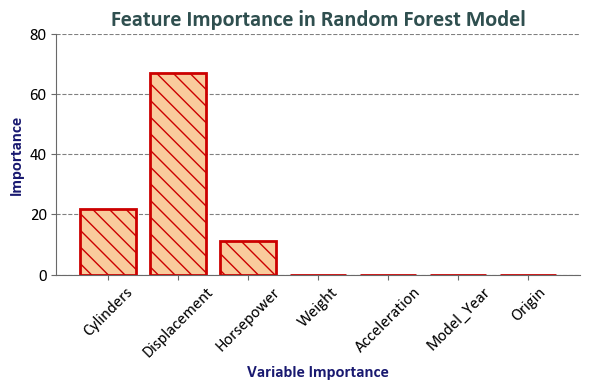

In [4]:
mse_train = metrics.mean_squared_error(y_train, rfr.predict(X_train))
mse_test = metrics.mean_squared_error(y_test, rfr.predict(X_test))
txt = f'MSE (Train) = {mse_train:.3f}\nMSE (Test) = {mse_test:.3f}'
print(txt)

# Create a DataFrame to store feature importances
Importance = pd.DataFrame({'Importance': 100*rfr.feature_importances_}, index = X.columns)

# Apply a background gradient to the DataFrame and round importance values to 2 decimal places
styled_importance = Importance.style.background_gradient(cmap='Oranges',
                                                         subset=['Importance']).format({'Importance': '{:.2f}'})

# Display the styled DataFrame
display(styled_importance)

# Create a bar plot to visualize feature importances
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
bars = ax.bar(Importance.index, Importance.Importance,
              color='#f9cb9c', edgecolor='#cc0000', hatch="\\\\", lw=2, zorder = 2)

# Set plot labels and title
ax.set_xlabel('Variable Importance', fontsize=12, weight='bold', color='#191970')
ax.set_ylabel('Importance', fontsize=12, weight='bold', color='#191970')
ax.set_title('Feature Importance in Random Forest Model', fontsize=16, weight='bold', color='#2F4F4F')

# Set y-axis limits and adjust tick parameters
ax.set_ylim([0, 80])
ax.tick_params(axis='x', rotation=45, labelsize=12, color='#696969')
ax.tick_params(axis='y', labelsize=12, color='#696969')

# Customize plot aesthetics
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_color('#696969')
ax.grid(axis='x')

# Ensure a tight layout for better visualization
plt.tight_layout()

The final accuracy of the random forest model is typically better than the average of the individual decision trees because the random forest model reduces overfitting and variance. Each decision tree in a random forest is trained on a random subset of the training data and a random subset of the features. This helps to reduce overfitting and improve the generalization of the model.

In our approach, we implement a comparative analysis using a loop to iterate over specific values of `n_estimators`, namely 3 and 10. Within each iteration, we create a Random Forest Regressor to represent models with different numbers of decision trees. By setting `random_state` to 0, we ensure reproducibility. This methodical process enables us to systematically evaluate and compare the performance of the Random Forest Regression model, specifically examining the influence of varying ensemble sizes on predictive outcomes.

n_estimators = 3:
	MSE (Train) = 0.003, MSE (Test) = 0.018
n_estimators = 10:
	MSE (Train) = 0.002, MSE (Test) = 0.014


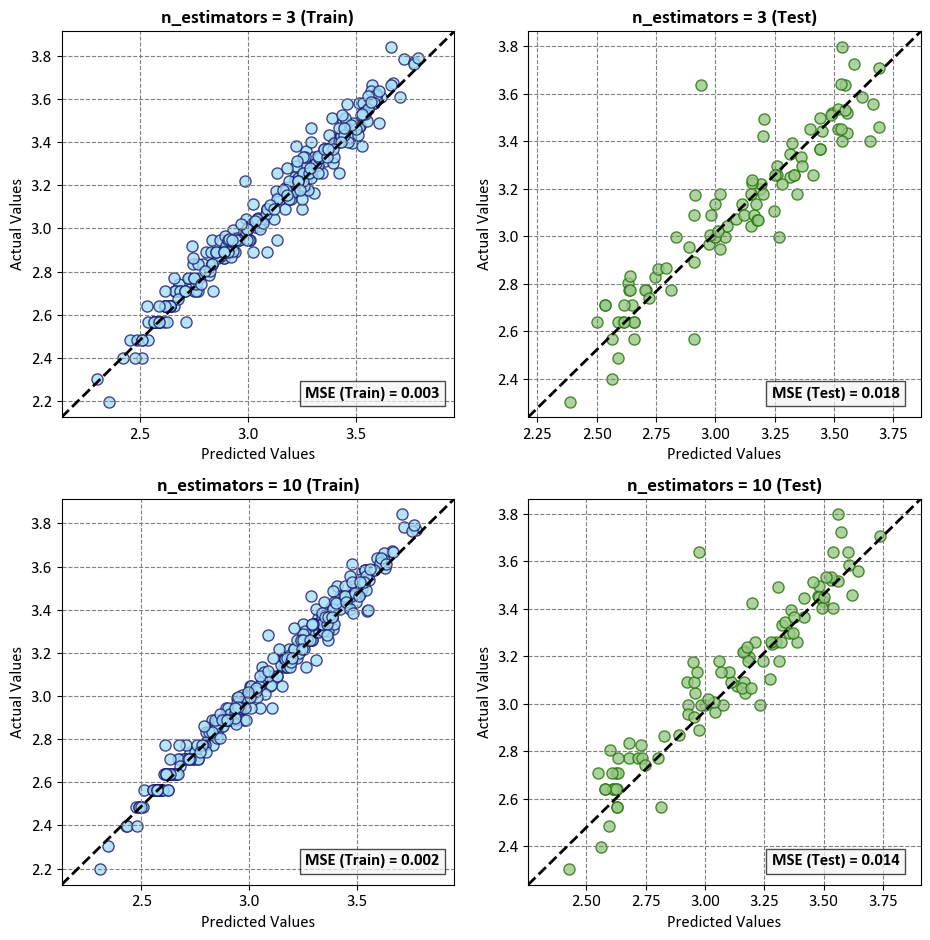

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
plt.style.use('../mystyle.mplstyle')

# Create a figure and subplots
fig, ax = plt.subplots(2, 2, figsize=(9.5, 9.5))

# Loop through different feature sets
for i, n_estimators in enumerate([3, 10]):
    # Create a Random Forest Regressor
    reg = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
    reg.fit(X_train, y_train)
    
    # Train set
    y_pred_train = reg.predict(X_train)
    ax[i, 0].scatter(y_pred_train, y_train,
                     facecolors='#a7e0f7', edgecolors='#191970', alpha=0.8)
    ax[i, 0].plot([0, 1], [0, 1], '--k', lw=2, transform=ax[i, 0].transAxes)
    mse_train = metrics.mean_squared_error(y_train, y_pred_train)
    txt_train = f'MSE (Train) = {mse_train:.3f}'
    text_train = ax[i, 0].text(0.62, 0.05, txt_train,
                               transform=ax[i, 0].transAxes, fontsize=12, weight='bold',
                               bbox=dict(facecolor='Whitesmoke', alpha=0.7))
    ax[i, 0].set(xlabel='Predicted Values', ylabel='Actual Values')
    ax[i, 0].set_title(f'n_estimators = {n_estimators} (Train)', fontsize=14, weight='bold')
    ax[i, 0].axis('equal')
    
    # Test set
    y_pred_test = reg.predict(X_test)
    ax[i, 1].scatter(y_pred_test, y_test,
                     facecolors='#9ac989', edgecolors='#217304', alpha=0.8)
    ax[i, 1].plot([0, 1], [0, 1], '--k', lw=2, transform=ax[i, 1].transAxes)
    mse_test = metrics.mean_squared_error(y_test, y_pred_test)
    txt_test = f'MSE (Test) = {mse_test:.3f}'
    text_test = ax[i, 1].text(0.62, 0.05, txt_test,
                              transform=ax[i, 1].transAxes, fontsize=12, weight='bold',
                              bbox=dict(facecolor='Whitesmoke', alpha=0.7))
    ax[i, 1].set(xlabel='Predicted Values', ylabel='Actual Values')
    ax[i, 1].set_title(f'n_estimators = {n_estimators} (Test)', fontsize=14, weight='bold')
    ax[i, 1].axis('equal')

    # Print MSE values
    txt = f'MSE (Train) = {mse_train:.3f}, MSE (Test) = {mse_test:.3f}'
    print_bold(f'n_estimators = {n_estimators}:')
    print(f'\t{txt}')

# Adjust layout and display the plots
plt.tight_layout()

For each subplot, a diagonal dashed line (–) serves as a reference, indicating where predicted values align with actual values.

The experiment compares the influence of the number of estimators, as denoted by `n_estimators`, on the mean squared error (MSE). Two configurations are assessed:

1. **n_estimators = 3**: MSE (Train) = 0.003, MSE (Test) = 0.018

2. **n_estimators = 10**: MSE (Train) = 0.002, MSE (Test) = 0.014

This experiment examines the performance of the model under varying numbers of decision tree estimators. The MSE serves as the evaluation metric, reflecting the average squared difference between observed and predicted values.

The observed trend suggests that increasing the number of estimators from 3 to 10 results in a reduction in MSE, indicative of improved predictive accuracy. This pattern aligns with the common understanding that an ensemble of more diverse and robust decision trees, as achieved with a greater number of estimators, often leads to enhanced model performance by mitigating overfitting and capturing more nuanced patterns in the data.

In our analysis, we delve into the feature importance aspect of a Random Forest Regressor instantiated with specific parameters: `n_estimators=100` and `random_state=0`. Understanding feature importance is pivotal for discerning the significant contributors to the model's predictive power. In the context of a Random Forest, feature importance is computed by assessing how much each feature reduces impurity across all decision trees in the ensemble. The higher the reduction in impurity, the more crucial the feature is deemed. Normalization ensures that the feature importance values sum up to 1, offering a relative measure of each feature's impact on the model's overall predictive accuracy. This exploration aids us in pinpointing and prioritizing the features that play a pivotal role in achieving accurate predictions.

,Importance
Cylinders,19.760
Displacement,28.724
Horsepower,13.538
Weight,28.257
Acceleration,2.141
Model_Year,7.354
Origin,0.225


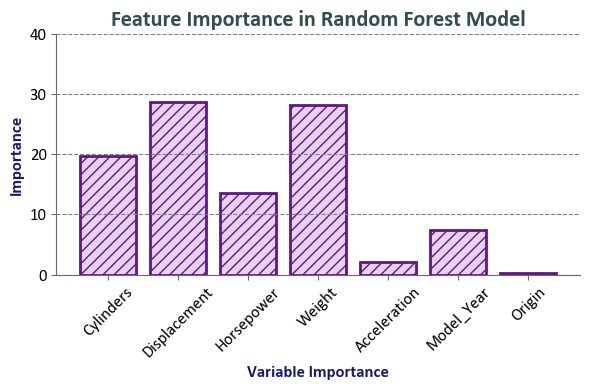

In [6]:
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Instantiate a RandomForestRegressor with 100 estimators and a random state of 0
reg = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the RandomForestRegressor model on the training data
reg.fit(X_train, y_train)

# Extract feature importances
feature_importances = reg.feature_importances_

# Create a DataFrame to store feature importances
Importance = pd.DataFrame({'Importance': reg.feature_importances_ * 100}, index=X.columns)

# Apply a background gradient to the DataFrame and round importance values to 3 decimal places
styled_importance = Importance.style.background_gradient(cmap='PuBu', subset=['Importance']).format({'Importance': '{:.3f}'})

# Display the styled DataFrame
display(styled_importance)
print('\n')

# Create a bar plot to visualize feature importances
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
bars = ax.bar(Importance.index, Importance.Importance, color='#e7d2f3', edgecolor='#611589', hatch="///", lw=2)

# Set plot labels and title
ax.set_xlabel('Variable Importance', fontsize=12, weight='bold', color='#191970')
ax.set_ylabel('Importance', fontsize=12, weight='bold', color='#191970')
ax.set_title('Feature Importance in Random Forest Model', fontsize=16, weight='bold', color='#2F4F4F')

# Set y-axis limits and adjust tick parameters
ax.set_ylim([0, 40])
ax.tick_params(axis='x', rotation=45, labelsize=12, color='#696969')
ax.tick_params(axis='y', labelsize=12, color='#696969')

# Customize plot aesthetics
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_color('#696969')
ax.grid(axis='x')

# Ensure a tight layout for better visualization
plt.tight_layout()

**Interpretation:**
- Features such as Displacement and Weight have relatively high importance scores (28.724 and 28.257, respectively), indicating their significant influence on predicting the natural logarithm of MPG.
- Cylinders and Horsepower also carry substantial importance (19.76 and 13.538, respectively).
- Acceleration has a comparatively lower importance (2.141).
- Model_Year contributes with a moderate importance (7.354).
- Origin has the lowest importance among the features (0.225).

These importance values suggest that, in the context of the model used, Displacement, Weight, and Cylinders play pivotal roles in predicting the natural logarithm of MPG, while other features contribute to varying degrees. It's essential to note that feature importance is model-specific and doesn't imply causation. It reflects the contribution of each feature to the model's predictive performance.

##  Random Forest Classifier

<font color='Blue'><b>Example</b></font>:  In this example, a Decision Tree Classifier is utilized to illustrate decision boundaries on synthetic data.

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


n_estimators = 3:
	F1-Score (Train) = 0.980, F1-Score (Test) = 0.924
n_estimators = 10:
	F1-Score (Train) = 0.992, F1-Score (Test) = 0.940


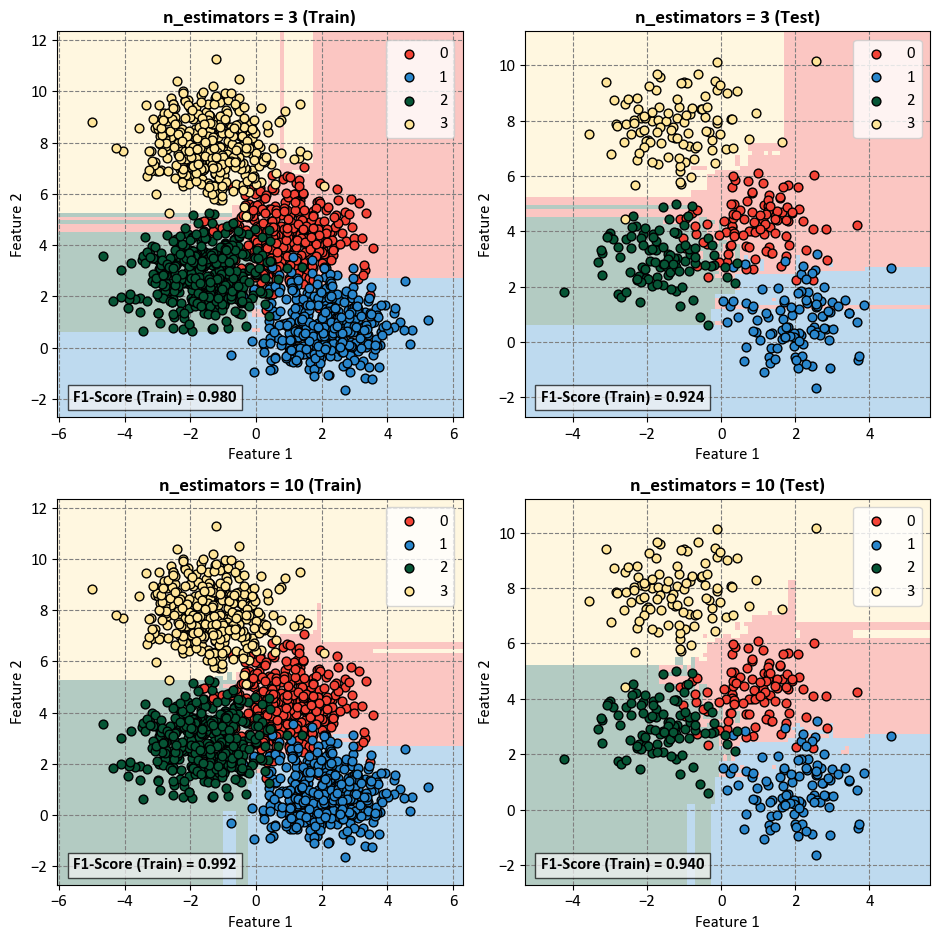

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearnex

# Patch sklearn for compatibility
sklearnex.patch_sklearn()

# Define colors and colormap for the plot
colors = ["#f44336", "#2986cc", "#065535", '#ffe599']

# Define a list of color names for the colormap
_cmap = ListedColormap(colors)

# Generate synthetic data using make_blobs
n_samples = 2000
n_features = 2
centers = 4
cluster_std = 1.0
X, y = make_blobs(n_samples=n_samples, n_features=n_features,
                  centers=centers, random_state=0, cluster_std=cluster_std)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

def _plot_set(reg, ax, X, y):
    # Plot decision boundaries
    DecisionBoundaryDisplay.from_estimator(reg, X, cmap=_cmap, ax=ax,
                                           response_method="predict",
                                           plot_method="pcolormesh",
                                           xlabel='Feature 1', ylabel='Feature 2',
                                           shading="auto",
                                           alpha=0.3)
    # Scatter plot for data points
    for num in np.unique(y):
        ax.scatter(X[:, 0][y == num], X[:, 1][y == num], c=colors[num],
                   s=40, edgecolors='k', marker='o', label=str(num), zorder=2)
    # Display F1-Score on the plot
    f1_score = metrics.f1_score(reg.predict(X), y, average='weighted')
    txt = f'F1-Score (Train) = {f1_score:.3f}'
    ax.text(0.04, 0.04, txt, transform=ax.transAxes, fontsize=12, weight='bold',
            bbox=dict(facecolor='Whitesmoke', alpha=0.7))
    ax.legend(fontsize=12)
    return f1_score

# Plot decision boundaries
fig, ax = plt.subplots(2, 2, figsize=(9.5, 9.5))

for i, n_estimators in enumerate([3, 10]):
    # Create a RandomForestClassifier with specified max_depth
    rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    
    # Fit the classifier to the data
    rfc.fit(X_train, y_train)
    f1_train = _plot_set(rfc, ax[i, 0], X_train, y_train)
    ax[i, 0].set_title(f'n_estimators = {n_estimators} (Train)', fontsize=14, weight='bold')
    f1_test = _plot_set(rfc, ax[i, 1], X_test, y_test)
    ax[i, 1].set_title(f'n_estimators = {n_estimators} (Test)', fontsize=14, weight='bold')
    
    # Print F1 values
    txt = f'F1-Score (Train) = {f1_train:.3f}, F1-Score (Test) = {f1_test:.3f}'
    print_bold(f'n_estimators = {n_estimators}:')
    print(f'\t{txt}')

# Adjust layout and display the plots
plt.tight_layout()

# Unpatch sklearn for original behavior
sklearnex.unpatch_sklearn()

The `n_estimators` parameter in a Random Forest classifier represents the number of trees in the forest. Increasing the number of estimators can have several effects on the model's performance, particularly in terms of training and testing F1-scores:

1. **n_estimators = 3:**
   - **Training F1-Score (Train) = 0.980:** This indicates how well the model is performing on the training data. A F1-score of 0.980 suggests high precision and recall on the training set, meaning the model is effectively capturing patterns in the data.
   - **Testing F1-Score (Test) = 0.924:** The F1-score on the test set is slightly lower than the training F1-score. This difference could be due to the model not generalizing as well to unseen data. With only three estimators, the model might be underfitting and not capturing the full complexity of the data.

2. **n_estimators = 10:**
   - **Training F1-Score (Train) = 0.992:** The higher F1-score on the training set suggests that increasing the number of estimators has allowed the model to better fit the training data. The model is capturing more intricate patterns present in the data.
   - **Testing F1-Score (Test) = 0.940:** The higher F1-score on the test set compared to the model with three estimators indicates that the model with ten estimators generalizes better to new, unseen data. It has a good balance between precision and recall, suggesting improved performance.

Increasing the number of estimators in a Random Forest generally leads to a more expressive and powerful model. However, it's important to monitor the model's performance on both the training and test sets to avoid overfitting. If the number of estimators is too high, the model might start memorizing the training data, leading to decreased generalization on unseen data. The optimal number of estimators depends on the complexity of the data and the trade-off between bias and variance. The observed improvement in F1-scores from 3 to 10 suggests that a higher number of estimators is beneficial in this case.

`````{admonition} Note
:class: warning

"Scikit-learn extensions" or "sklearnex" refers to additional modules or libraries that build upon the scikit-learn library, which is a machine learning library for Python. These extensions typically provide extra functionality, new algorithms, or improved features to enhance the capabilities of scikit-learn in various ways. The term "sklearnex" may encompass a range of third-party contributions aimed at extending and complementing the existing scikit-learn ecosystem.

The function `sklearnex.patch_sklearn()` is a method within the scikit-learn extensions framework. Its primary purpose is to patch or modify the behavior of the scikit-learn library by incorporating additional functionalities or improvements provided by sklearnex.

This function is typically employed to seamlessly integrate the extensions into the scikit-learn library, ensuring that the enhanced features or modifications become part of the standard scikit-learn functionality. By invoking `sklearnex.patch_sklearn()`, users can apply the necessary adjustments to the scikit-learn library, enabling the utilization of extended capabilities offered by the sklearnex framework within their machine learning workflows. Additional information can be found by referring to the documentation available [here](https://github.com/intel/scikit-learn-intelex).
`````

In [8]:
import numpy as np
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from pprint import pprint
import sklearnex

# Patch sklearn for compatibility
sklearnex.patch_sklearn()

# Create a RandomForestClassifier with default parameters
rfc = RandomForestClassifier(random_state=0)

# Define the hyperparameter search space using param_dist
param_dist = dict(max_depth=[3, 5, None],
                  max_leaf_nodes=[10, None],
                  min_samples_split=[2, 3, 10]
                  )

from sklearn.metrics import make_scorer
scoring = metrics.make_scorer(metrics.f1_score, average='weighted')

# Initialize HalvingRandomSearchCV with the estimator and parameter distributions
rsh = HalvingRandomSearchCV(estimator=rfc,
                            param_distributions=param_dist,
                            resource='n_estimators',
                            max_resources=10,
                            scoring = scoring,
                            factor=2,
                            random_state=0)

# Fit the search object to your data
_ = rsh.fit(X_train, y_train)

# Get the best hyperparameters found by the search
best_params_ = rsh.best_params_
pprint(best_params_)

# Unpatch sklearn for original behavior
sklearnex.unpatch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


{'max_depth': 5,
 'max_leaf_nodes': 10,
 'min_samples_split': 10,
 'n_estimators': 8}


The core of this example is the utilization of the `HalvingRandomSearchCV` technique, which efficiently narrows down the hyperparameter search space. The technique gradually discards suboptimal combinations, ultimately converging on the best configuration. By fitting the search object to a dataset (`X` and `y`), the code extracts and prints the best hyperparameters found by the search process. This example provides a valuable insight into how `HalvingRandomSearchCV` can significantly speed up the search process while identifying hyperparameters that lead to improved model performance. It's a demonstration of harnessing cutting-edge techniques to fine-tune machine learning models effectively.

In [9]:
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import sklearnex
sklearnex.patch_sklearn()

def print_bold(txt, c = 31):
    print(f"\033[1;{c}m" + txt + "\033[0m")

def _Line(n = 80):
    print(n * '_')

# Create a RandomForestClassifier instance
rfc = RandomForestClassifier(random_state = 0, **best_params_)

# Initialize StratifiedKFold cross-validator
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
# The splitt would be 80-20!

# Lists to store train and test scores for each fold
train_acc_scores, test_acc_scores, train_f1_scores, test_f1_scores = [], [], [], []
train_class_proportions, test_class_proportions = [], []
   
# Perform Cross-Validation
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    rfc.fit(X_train, y_train)
    
    # Calculate class proportions for train and test sets
    train_class_proportions.append([np.mean(y_train == rfc) for rfc in np.unique(y)])
    test_class_proportions.append([np.mean(y_test == rfc) for rfc in np.unique(y)])
    
    # train
    y_train_pred = rfc.predict(X_train)
    train_acc_scores.append(metrics.accuracy_score(y_train, y_train_pred))
    train_f1_scores.append(metrics.f1_score(y_train, y_train_pred, average = 'weighted'))
    
    # test
    y_test_pred = rfc.predict(X_test)
    test_acc_scores.append(metrics.accuracy_score(y_test, y_test_pred))
    test_f1_scores.append(metrics.f1_score(y_test, y_test_pred, average = 'weighted'))

_Line()
#  Print the Train and Test Scores for each fold
for fold in range(n_splits):
    print_bold(f'Fold {fold + 1}:')
    print(f"\tTrain Class Proportions: {train_class_proportions[fold]}*{len(y_train)}")
    print(f"\tTest Class Proportions: {test_class_proportions[fold]}*{len(y_test)}")
    print(f"\tTrain Accuracy Score = {train_acc_scores[fold]:.4f}, Test Accuracy Score = {test_acc_scores[fold]:.4f}")
    print(f"\tTrain F1 Score (weighted) = {train_f1_scores[fold]:.4f}, Test F1 Score (weighted)= {test_f1_scores[fold]:.4f}")

_Line()
print_bold('Accuracy Score:')
print(f"\tMean Train Accuracy Score: {np.mean(train_acc_scores):.4f} ± {np.std(train_acc_scores):.4f}")
print(f"\tMean Test Accuracy Score: {np.mean(test_acc_scores):.4f} ± {np.std(test_acc_scores):.4f}")
print_bold('F1 Score:')
print(f"\tMean F1 Accuracy Score (weighted): {np.mean(train_f1_scores):.4f} ± {np.std(train_f1_scores):.4f}")
print(f"\tMean F1 Accuracy Score (weighted): {np.mean(test_f1_scores):.4f} ± {np.std(test_f1_scores):.4f}")
_Line()
sklearnex.unpatch_sklearn()

________________________________________________________________________________
Fold 1:
	Train Class Proportions: [0.25, 0.25, 0.25, 0.25]*1600
	Test Class Proportions: [0.25, 0.25, 0.25, 0.25]*400
	Train Accuracy Score = 0.9331, Test Accuracy Score = 0.9325
	Train F1 Score (weighted) = 0.9332, Test F1 Score (weighted)= 0.9331
Fold 2:
	Train Class Proportions: [0.25, 0.25, 0.25, 0.25]*1600
	Test Class Proportions: [0.25, 0.25, 0.25, 0.25]*400
	Train Accuracy Score = 0.9350, Test Accuracy Score = 0.9400
	Train F1 Score (weighted) = 0.9350, Test F1 Score (weighted)= 0.9396
Fold 3:
	Train Class Proportions: [0.25, 0.25, 0.25, 0.25]*1600
	Test Class Proportions: [0.25, 0.25, 0.25, 0.25]*400
	Train Accuracy Score = 0.9375, Test Accuracy Score = 0.9150
	Train F1 Score (weighted) = 0.9369, Test F1 Score (weighted)= 0.9147
Fold 4:
	Train Class Proportions: [0.25, 0.25, 0.25, 0.25]*1600
	Test Class Proportions: [0.25, 0.25, 0.25, 0.25]*400
	Train Accuracy Score = 0.9419, Test Accuracy Score = 

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Here are some observations and recommendations based on the output:

1. **Model Performance:**
   - Our model demonstrates strong learning from the training data, evident in high accuracy and F1 scores.
   - The generalization to unseen data is good, with slightly lower but still robust testing accuracy and F1 scores.

2. **Consistency Across Folds:**
   - Our model maintains consistent performance across different subsets of the data, as indicated by low variability in accuracy and F1 scores across folds.

3. **Optimal Hyperparameter Settings:**
   - The hyperparameters we selected through the HalvingRandomSearchCV process (such as `max_depth`, `max_leaf_nodes`, `min_samples_split`) show promise, providing effective results. However, fine-tuning may further enhance performance.

4. **Addressing Overfitting:**
   - The model excels on the training set, suggesting some potential overfitting. To mitigate this, we might explore additional hyperparameter tuning or regularization techniques.

5. **Balanced Class Proportions:**
   - We've maintained balanced class proportions in both training and testing sets, promoting fair training without favoring any specific class.

6. **Future Steps:**
   - Further exploration of hyperparameter values or additional parameters could optimize our model.

In summary, our model exhibits strong performance, and refining hyperparameters could lead to even better results. Consistent evaluation and potential adjustments will ensure our model's effectiveness in real-world scenarios.

`````{admonition} Remark
:class: important

Let's explore the upsides and downsides of using the `HalvingRandomSearchCV` technique for hyperparameter tuning:

**Advantages:**

1. **Efficiency:** The essence of `HalvingRandomSearchCV` lies in its efficiency. It's tailored to swiftly whittle down the expansive realm of hyperparameters by systematically discarding less promising configurations. This strategic pruning, carried out through successive iterations, outpaces the exhaustive search alternatives.

2. **Resource Economy:** The technique progressively slashes the number of candidate parameter combinations, translating to resource savings in comparison to approaches that meticulously explore the entire parameter landscape. This aspect is particularly advantageous when dealing with intricate models and voluminous datasets.

3. **Timely Termination:** `HalvingRandomSearchCV` integrates an ingenious "early stopping" mechanism that halts the search once it detects suboptimal parameter combinations. This prevents unnecessary resource expenditure on subpar candidates.

4. **Convergence to Excellence:** As the technique evolves, it homes in on the most auspicious corners of the hyperparameter space. This steady refinement significantly elevates the prospects of identifying configurations that deliver peak model performance.

5. **Versatility:** The technique exhibits versatility in accommodating a diverse array of hyperparameters, transcending any restrictions imposed by a predefined search space configuration.

**Disadvantages:**

1. **Potential Missed Opportunities:** Although efficiency is a hallmark, `HalvingRandomSearchCV` might inadvertently bypass portions of the hyperparameter space. This possibility of overlooking less apparent optimal configurations necessitates cautious consideration.

2. **Sampling Bias:** The involvement of random sampling in each iteration brings forth the potential of sampling bias. This bias might favor certain pockets of the hyperparameter space and thereby impact the holistic quality of the search.

3. **Resource Intensiveness:** Despite its enhanced efficiency compared to exhaustive searches, `HalvingRandomSearchCV` is not without resource demands. For substantial datasets and intricate models, computational resources remain a crucial consideration.

4. **Exploration Restraints:** The technique's concentration on paring down the search space could curtail the breadth of parameter combination exploration, potentially leading to suboptimal selections.

5. **Sensitivity to `factor`:** The efficacy of `HalvingRandomSearchCV` can hinge on the selection of the `factor` parameter, which determines the fraction of parameter sets retained in each iteration. An unsuitable `factor` value might influence the search's effectiveness.

6. **Complexity in High Dimensions:** Navigating high-dimensional hyperparameter spaces might entail a prolonged sequence of iterations to achieve effective convergence. This prolonged trajectory could extend the tuning process.

7. **Variable Impact:** The dividends reaped from `HalvingRandomSearchCV` are contingent on the interplay of dataset and model characteristics. Certain models may not extract the same benefits as others from this technique.

While `HalvingRandomSearchCV` furnishes efficiency and resource conservation, it also carries the potential of missing optimal configurations and introduces nuances like sampling bias. To adopt or not to adopt this technique hinges on weighing these pros and cons against the backdrop of your specific problem, resources, and requirements.

`````